# **Project title:** Customer Segmentation -Unsupervised Clustering

## **Business objective and problem statement**

### Business objective

Customer segmentation is a way to split customers into groups based on certain characteristics that those customers share. All customers share the common need of your product or service, but beyond that, there are distinct demographic differences (i.e., age, gender) and they tend to have additional socio-economic, lifestyle, or other behavioral differences that can be useful to the organization.
In this case we will look upon a dataset for a non-store online retail upon which we perfrom data wrangling knowledge and skills to transform and clean the data. after which  we apply a machine learning model K-means clustering which is a type of unspervised learning to cluster the customers into differents segments to perform further analysis.

### Problem statement

Our aim to analyse and tranform the data to cluster the customers into segments using a machine learning model which will help business owners provide the customer behaviour of different customers and help them distribute loyality coupons to loyal customers and offer to attract new customers and irregular customers to attract more customers at festival season.


# Know your dataset

In [76]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import
import datetime as dt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/pandas dataset/Online Retail.csv')

Mounted at /content/drive


In [3]:
# First view of dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [5]:
# Count of rows and columns
df.shape

(541909, 8)

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

##**data description**



*   InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

*   StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely
assigned to each distinct product.
*   Description: Product (item) name. Nominal.
*   Quantity: The quantities of each product (item) per transaction. Numeric.
*   InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
*   UnitPrice: Unit price. Numeric, Product price per unit in sterling.
*   CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
*   Country: Country name. Nominal, the name of the country where each customer resides.




##**Dataset description**

In [7]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
# Statistical description

df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Null and duplicate values

In [9]:
# checking null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

The dataset consist of 1454 null values in Description column and 135080 null values in customerid column.

In [10]:
# Checking duplicate values
df.duplicated().sum()

5268

There are 5268 duplicated rows present in the data

In [11]:
# Removing null and duplicate values
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [12]:
# shpe of dataset after treating null and duplicate values
df.shape

(401604, 8)

In [13]:
# Checking cancelled orders
df[df['InvoiceNo'].str.contains('C', na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


In [14]:
# consider only non_cancelled orders
df = df[~df['InvoiceNo'].str.contains('C', na=False)]

In [15]:
# Shape of dataset
df.shape

(392732, 8)

In [16]:
# check for columns with zero unit prce
df[df['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/10 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/10 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/10 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/11 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/11 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/11 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/11 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/11 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/11 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/11 14:42,0.0,14410.0,United Kingdom


In [17]:
# Remove columns with zero unit price
df = df[df['UnitPrice'] != 0]
df.shape

(392692, 8)

In [18]:
# description of the dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


# Feature engineering

In [19]:
# convert invoicedate column into datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = "%m/%d/%y %H:%M")

In [20]:
# create some new features from invoice date
df['day'] = df['InvoiceDate'].dt.day_name()
df['year'] = df['InvoiceDate'].apply(lambda x: x.year)
df['month_num'] = df['InvoiceDate'].apply(lambda x: x.month)
df['day_num'] = df['InvoiceDate'].apply(lambda x: x.day)
df['hour'] = df['InvoiceDate'].apply(lambda x: x.hour)
df['minute'] = df['InvoiceDate'].apply(lambda x: x.minute)
df['month'] = df['InvoiceDate'].dt.month_name()

In [21]:
# create TotalAmount from Quantity and UnitPrice
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,month_num,day_num,hour,minute,month,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,December,20.34


# Exploratory Data Analysis:
We will be discovering insights like:
Which products are the most and least sold ones?

Which countries has the most and least number of customers?

Distribution of the numerical features.

Which day had the most and least number of purchases?

Which month had the most and least number of purchases?

Which hour in a day had the most and least number of purchases?

#### Which product are the most sold ones?


In [23]:
# Creating a new dataframe to store description data
desc_df = df['Description'].value_counts().reset_index()

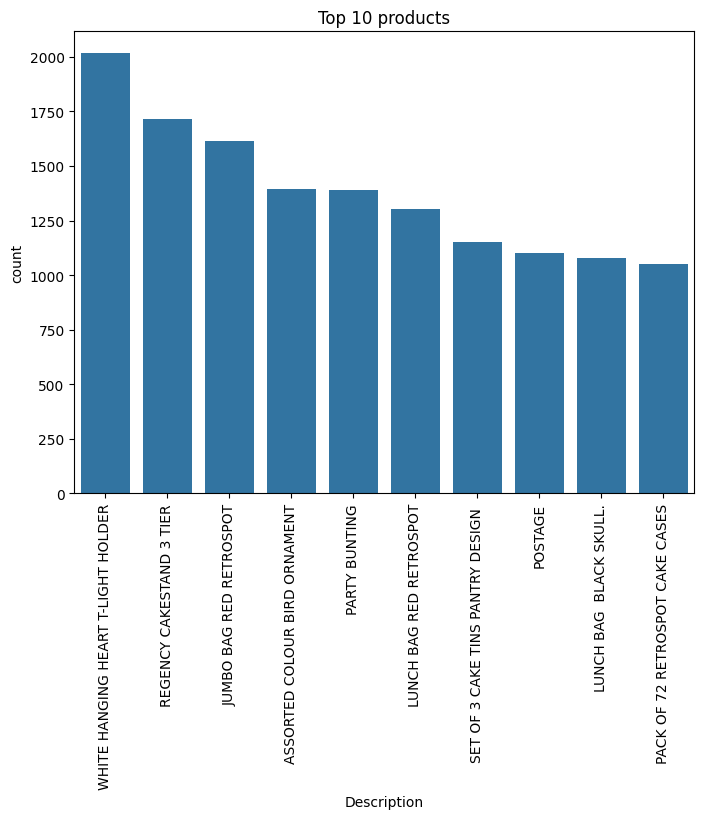

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(x='Description', y='count',data=desc_df[:10])
plt.title('Top 10 products')
plt.xticks(rotation=90)
plt.show()

#### Which are the least sold products?

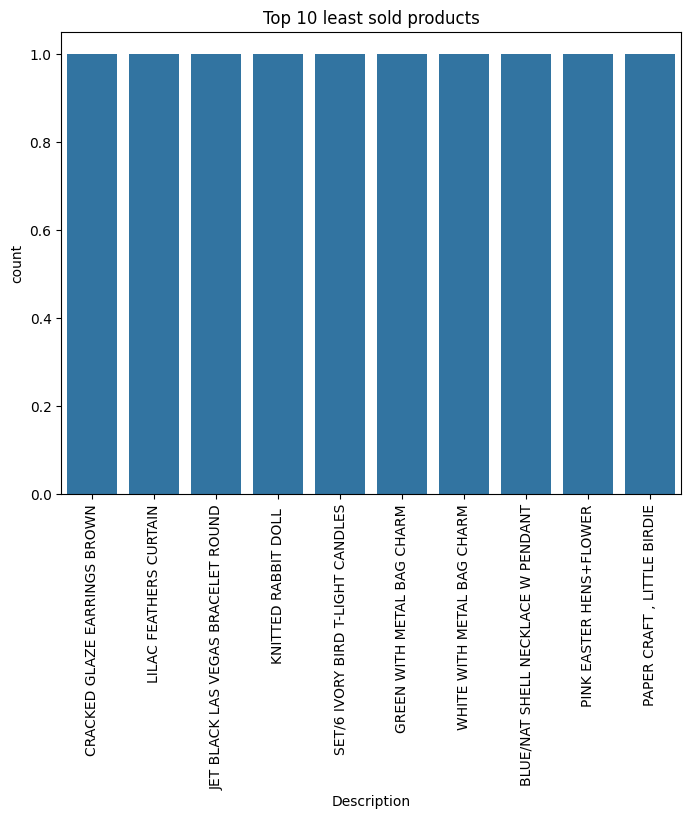

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x='Description', y='count',data=desc_df[-10:])
plt.title('Top 10 least sold products')
plt.xticks(rotation=90)
plt.show()

#### Which country has the most number of customers

In [26]:
country_df= df['Country'].value_counts().reset_index()

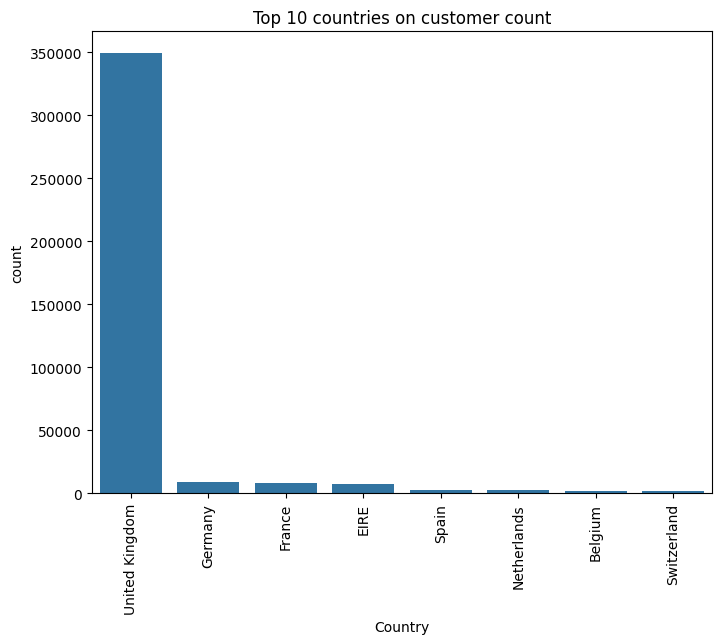

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(x='Country', y='count',data=country_df[:8])
plt.title('Top 10 countries on customer count')
plt.xticks(rotation=90)
plt.show()

#### which country has the least number of customers


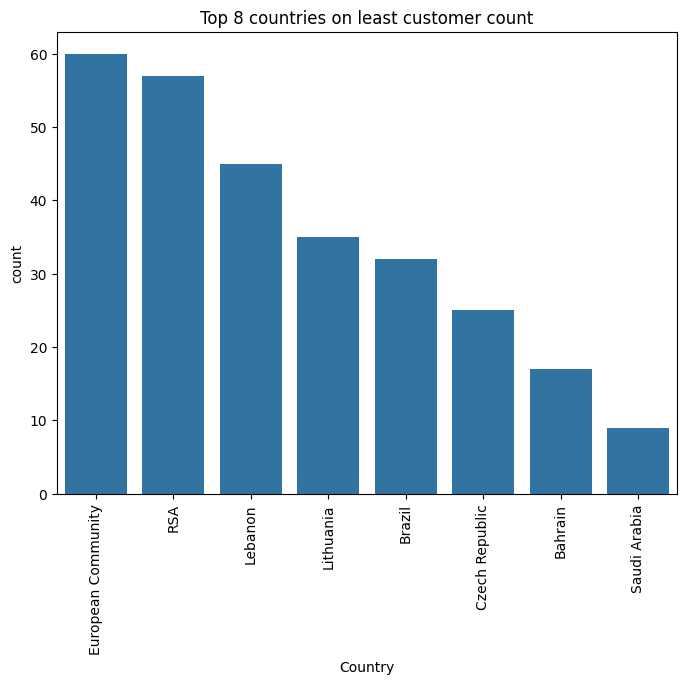

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(x='Country', y='count',data=country_df[-8:])
plt.title('Top 8 countries on least customer count')
plt.xticks(rotation=90)
plt.show()

#### distribution of the numerical features

<ipython-input-31-8066bd8da75c>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,count)
<ipython-input-31-8066bd8da75c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
<ipython-input-31-8066bd8da75c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use 

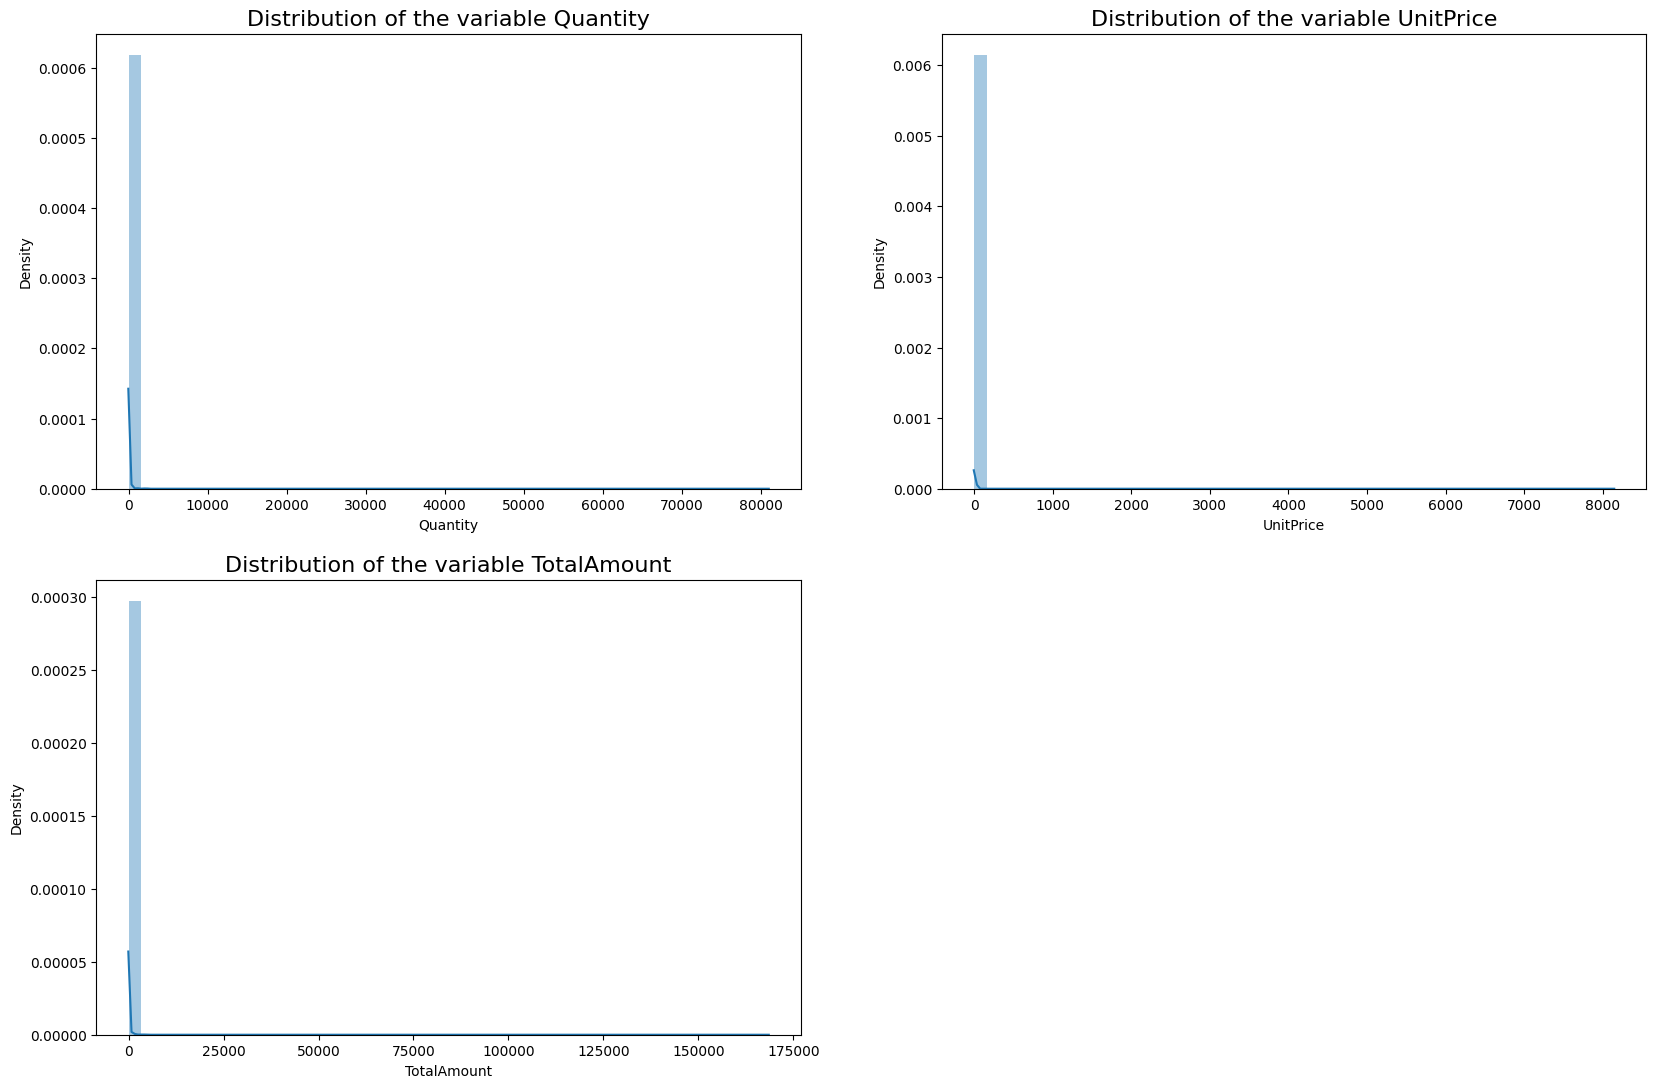

In [31]:
num_features = ['Quantity', 'UnitPrice', 'TotalAmount']
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

The distribution of all the variables are rightly skewed so we perform Log transormation to reduce the skewness from the data.

<ipython-input-30-f9d19e1b99ac>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,count)
<ipython-input-30-f9d19e1b99ac>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df[feature]))
<ipython-input-30-f9d19e1b99ac>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your co

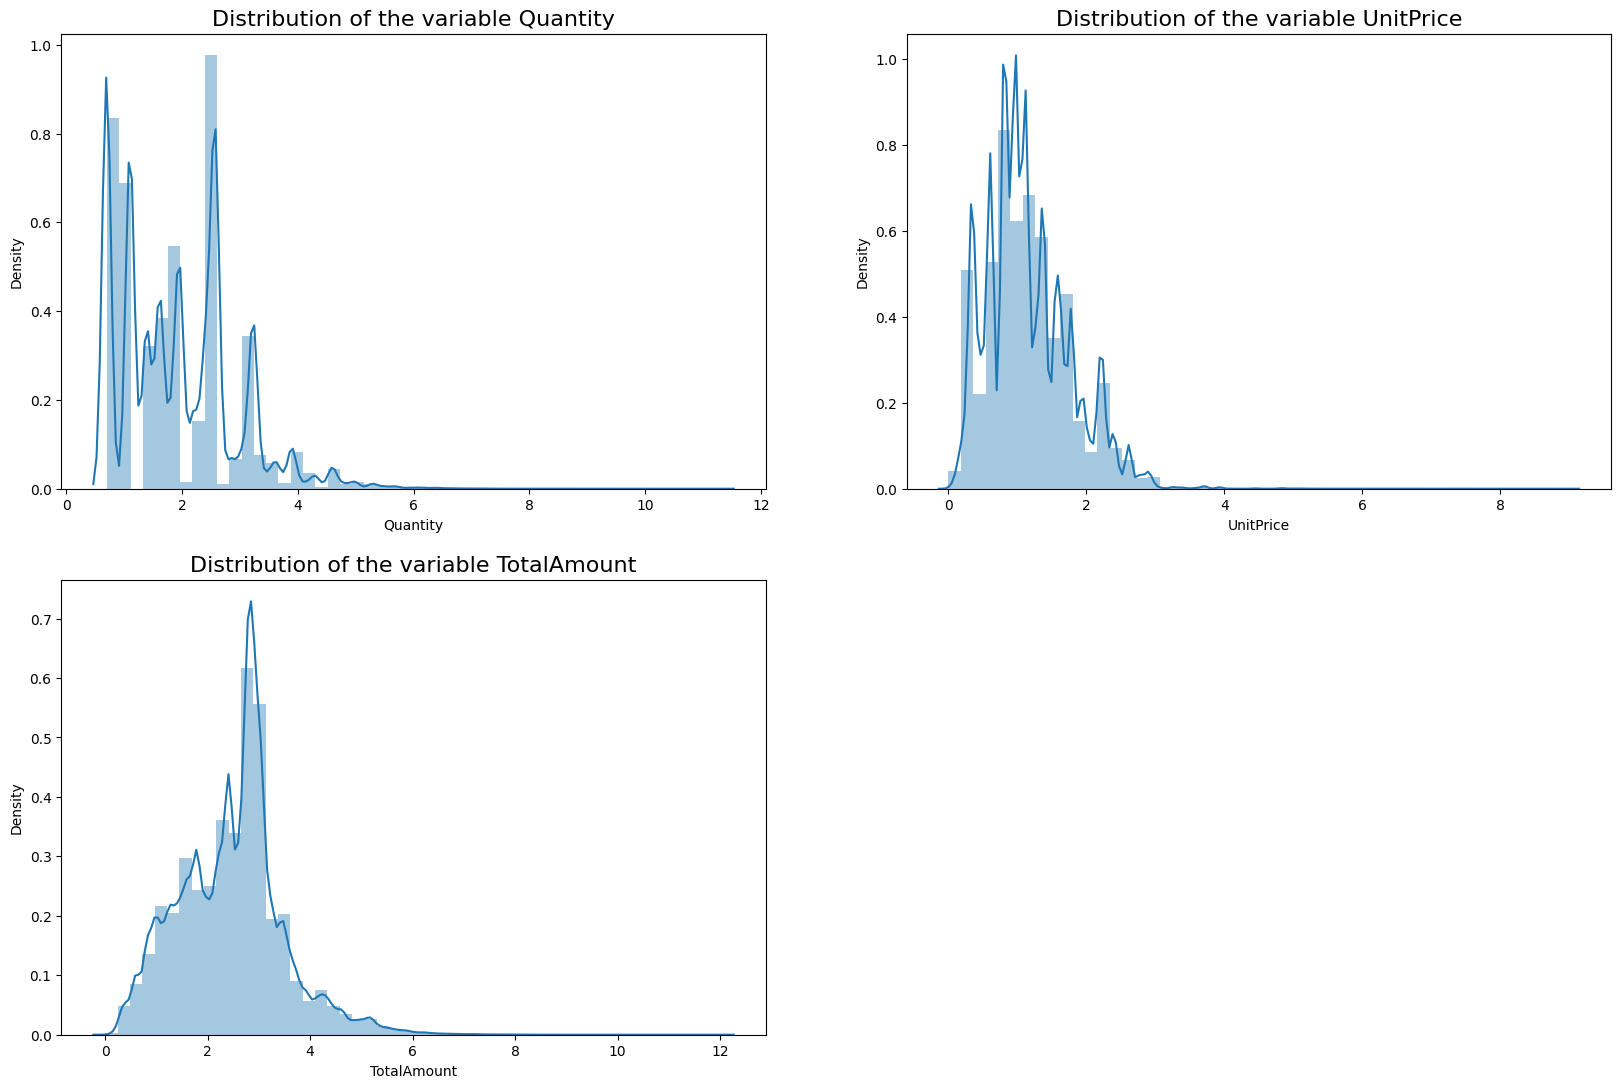

In [30]:
# taking a log transformation
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(np.log1p(df[feature]))
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

### Which day of the week had the most and the least number of purchases?

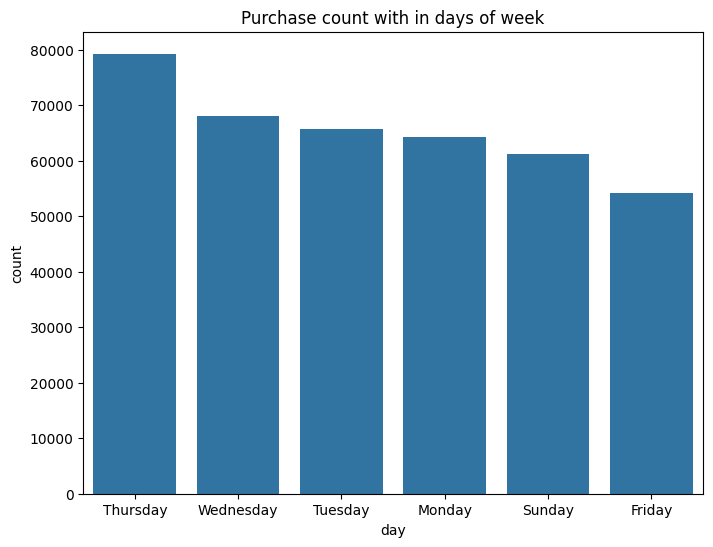

In [32]:
week_df=df['day'].value_counts().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='day', y='count',data=week_df)
plt.title("Purchase count with in days of week")
plt.show()

### Which month had the most and the least number of purchases?

Text(0.5, 1.0, 'Purchase count with in months')

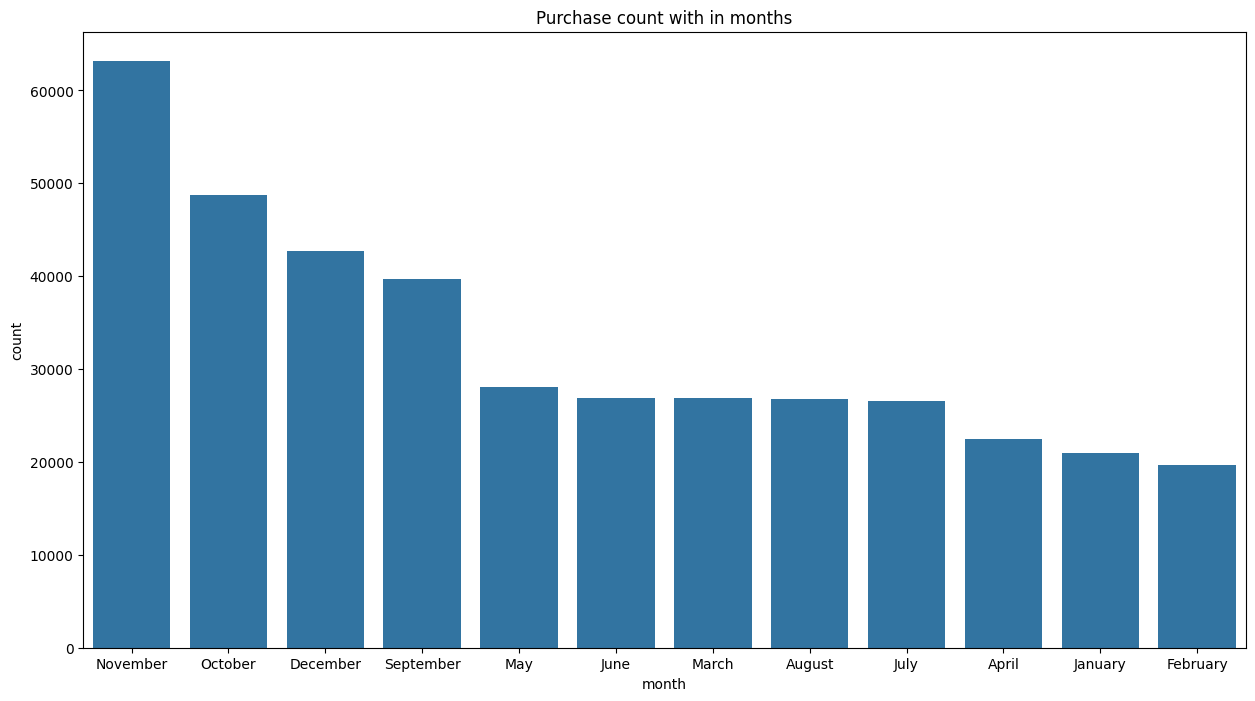

In [36]:
month_df=df['month'].value_counts().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x='month', y='count',data=month_df)

plt.title("Purchase count with in months")

### Which hour of the day has the most and least number of purchase

Text(0.5, 1.0, 'Purchase count with in hours')

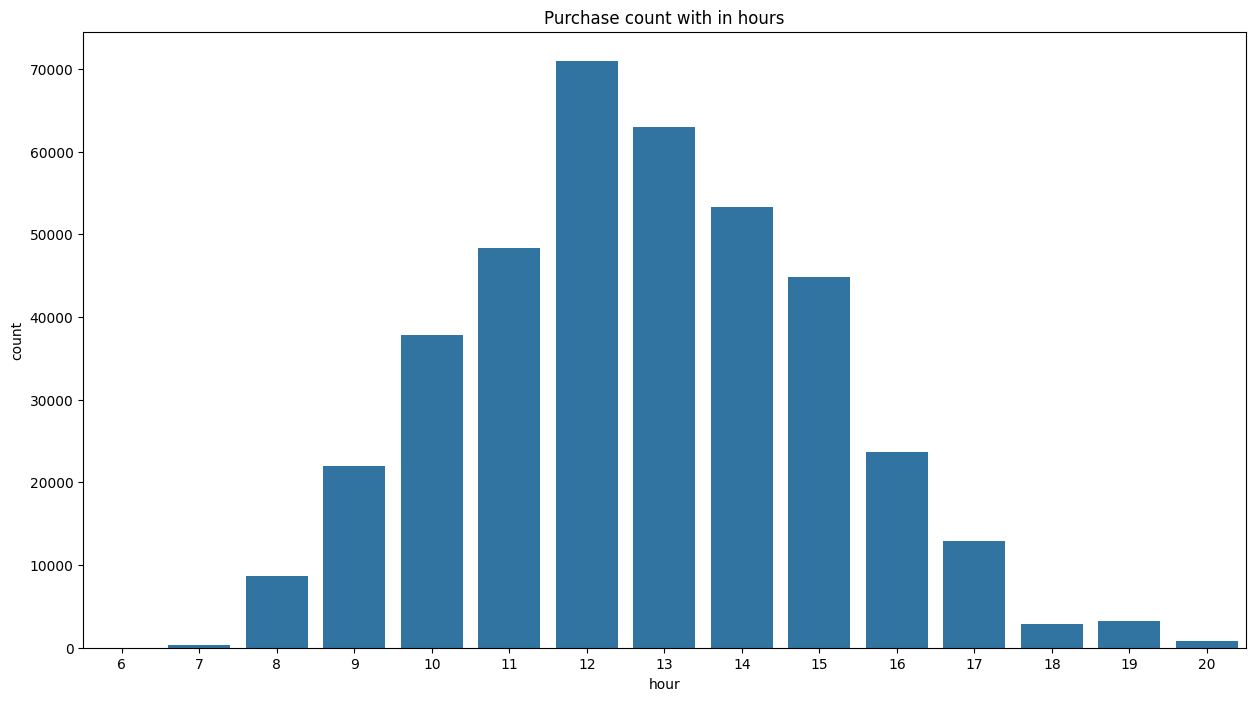

In [38]:
Hour_df=df['hour'].value_counts().reset_index(name='count')
plt.figure(figsize=(15,8))
sns.barplot(x='hour', y='count',data=Hour_df)
plt.title("Purchase count with in hours")

## Apply RFM model

As we are looking for the purchases made in Uk so we will filter the data for the purchases made in UK only and apply rfm model over it.

In [53]:
# Creating a new copy of original dataset
df1=df.copy()

In [54]:
# Filter the data only for Uk based customers
df1=df1[df1['Country']=='United Kingdom']

# shape of new dataset
df1.shape

(349203, 16)

In [55]:
# calculating RFM scores
# set latest date to '2011-12-10' as the last invoice date was '2011-12-09'
import datetime as dt
latest_date = dt.datetime(2011,12,10)

# create rfm modeling scores for each customer
rfm_df = df1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days, 'InvoiceNo': lambda x: len(x),
                                            'TotalAmount': lambda x: x.sum()})

# convert invoice date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# rename columns to frequency, recency, monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4412,33053.19
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [56]:
# statistical description
rfm_df.describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,91.742092,89.082398,1858.424654
std,99.533485,214.034542,7478.631256
min,0.000000,1.000000,3.750000
25%,17.000000,17.000000,298.185000
50%,50.000000,40.000000,644.975000
75%,142.000000,98.000000,1571.285000
max,373.000000,7676.000000,259657.300000


### Plot Recenct, Frequency and Monetory

<ipython-input-57-1eeac11780d3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_df['Recency'])


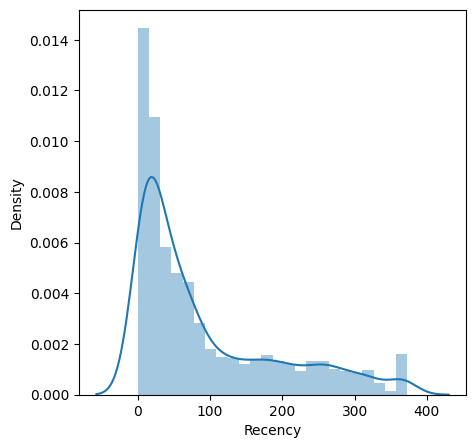

<ipython-input-57-1eeac11780d3>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_df['Frequency'])


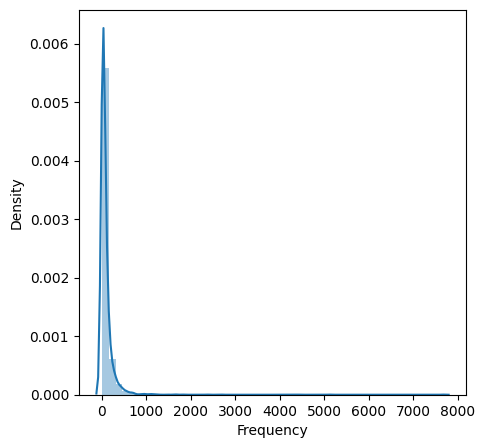

<ipython-input-57-1eeac11780d3>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_df['Monetary'])


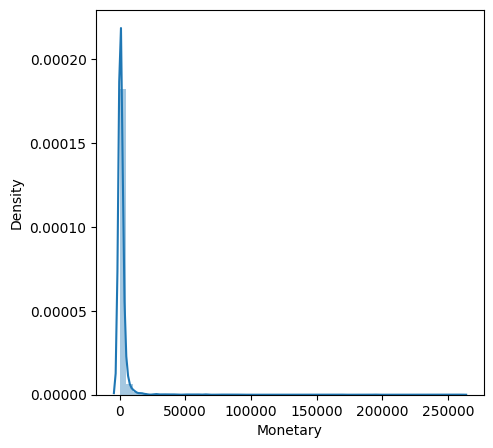

In [57]:
# plottinf Recency
plt.subplots(figsize=(5,5))
sns.distplot(rfm_df['Recency'])
plt.show()

# plotting Frequency
plt.subplots(figsize=(5,5))
sns.distplot(rfm_df['Frequency'])
plt.show()

#plotting Monetary
plt.subplots(figsize=(5,5))
sns.distplot(rfm_df['Monetary'])
plt.show()

All the three(Recency, Frequency and Monatory) are rightlt skewed so we have to transformation to reduce the skewness. We will apply log transformation over the rfm_df table  to reduce the skewness from the data.

In [58]:
# Applying log tranformation
log_df=np.log1p(rfm_df)

<ipython-input-59-50e097ac21ea>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_df[i])


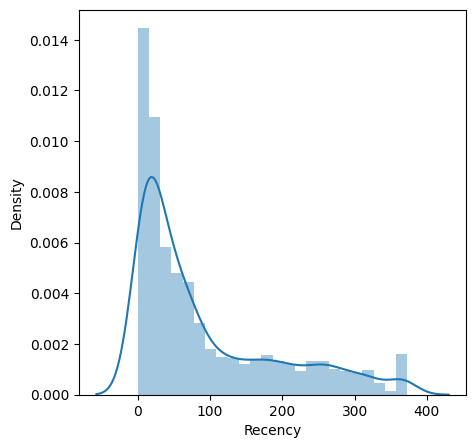

<ipython-input-59-50e097ac21ea>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_df[i])


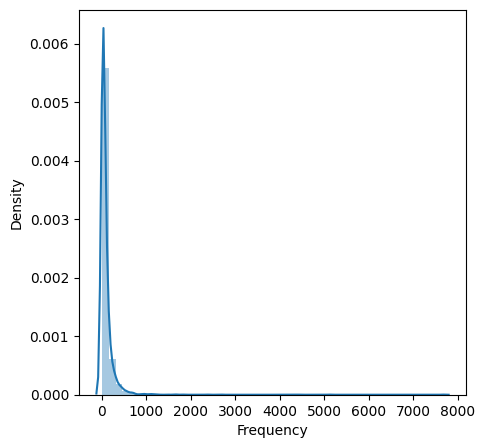

<ipython-input-59-50e097ac21ea>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_df[i])


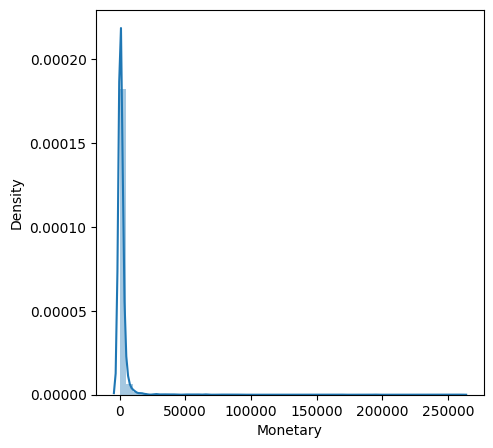

In [59]:
# Plotting Recency, Frequency and Monetary
for i in ['Recency', 'Frequency', 'Monetary']:
  plt.subplots(figsize=(5,5))
  sns.distplot(rfm_df[i])
  plt.show()



*   The distribution of the values are normal now



In [64]:
# apply log transformation on the original rfm dataframe

rfm_df['Recency_log'] = np.log1p(rfm_df['Recency'])
rfm_df['Frequency_log'] = np.log1p(rfm_df['Frequency'])
rfm_df['Monetary_log'] = np.log1p(rfm_df['Monetary'])

# Display new dataframe
rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,
12346.0,325,1,77183.60,5.786897,0.693147,11.253955
12747.0,2,103,4196.01,1.098612,4.644391,8.342128
12748.0,0,4412,33053.19,0.000000,8.392310,10.405904
12749.0,3,199,4090.88,1.386294,5.298317,8.316760
12820.0,3,59,942.34,1.386294,4.094345,6.849427


In [77]:
# Scaling our dataset

features = ['Recency_log', 'Frequency_log', 'Monetary_log']
X_features = rfm_df[features].values
scaler = StandardScaler()
X = scaler.fit_transform(X_features)

In [80]:
# Elbow method to find out best k
from yellowbrick.cluster import KElbowVisualizer
SSE = {}
for k in range(1,15):
  km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 1000)
  km = km.fit(X)
  SSE[k] = km.inertia_


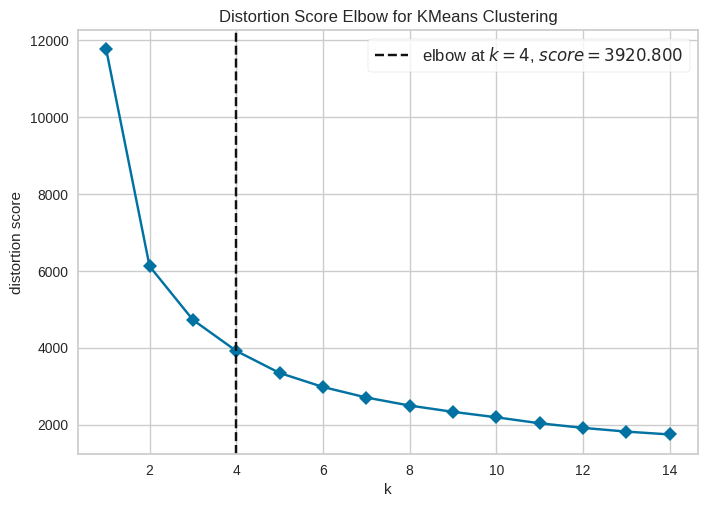

In [81]:
# plot the graph for SSE and number of clusters
visualizer = KElbowVisualizer(km, k=(1,15), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.poof()
plt.show()

from the elnow method we found that the optimum number of cluster is 4 and the distortion score is 3920.80.

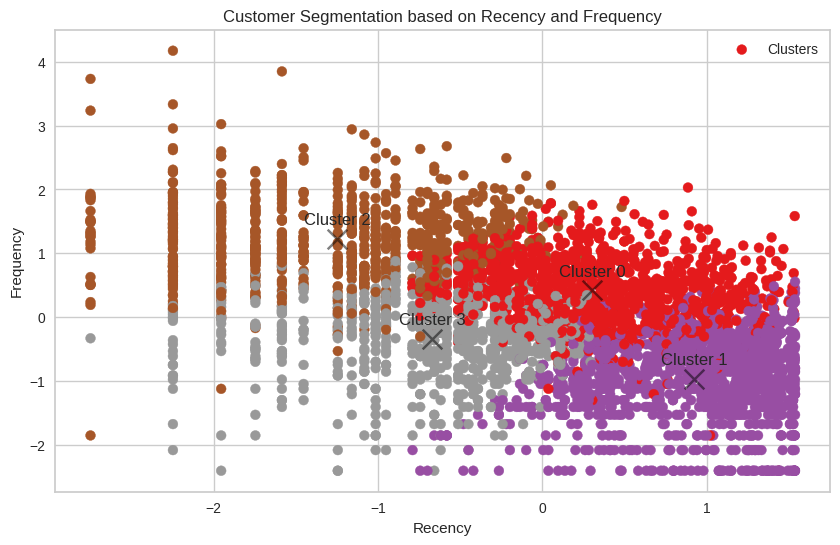

In [83]:
#Implementing KMeans clustering algorithm
from sklearn.cluster import KMeans

# Assuming X is your data array
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_km = kmeans.predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.title('Customer Segmentation based on Recency and Frequency')
plt.scatter(X[:,0], X[:,1], c=y_km, s=50, cmap='Set1', label='Clusters')

# Plot and annotate the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5, marker='x')
for i, center in enumerate(centers):
    plt.annotate(f'Cluster {i}', (center[0], center[1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Interpreting the clusters with the help of rfm froup

In [84]:
# split the rfm values into four quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [85]:
# function to create R, F, M segments
def RScore(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

def FnMScore(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [86]:
# calculate RFM segment values for each record
rfm_df['R'] = rfm_df['Recency'].apply(RScore, args=('Recency', quantiles, ))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScore, args=('Frequency', quantiles, ))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScore, args=('Monetary', quantiles, ))
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M
0,12346.0,325,1,77183.60,5.786897,0.693147,11.253955,4,4,1
1,12747.0,2,103,4196.01,1.098612,4.644391,8.342128,1,1,1
2,12748.0,0,4412,33053.19,0.000000,8.392310,10.405904,1,1,1
3,12749.0,3,199,4090.88,1.386294,5.298317,8.316760,1,1,1
4,12820.0,3,59,942.34,1.386294,4.094345,6.849427,1,2,2


\#### **Calculate RFM Group and RFM Score from the RFM segmentation:**

In [87]:
# add RFM group column
rfm_df['RFMGroup'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

# calculate RFM score from RFM group column
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis=1)
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore
0,12346.0,325,1,77183.60,5.786897,0.693147,11.253955,4,4,1,441,9
1,12747.0,2,103,4196.01,1.098612,4.644391,8.342128,1,1,1,111,3
2,12748.0,0,4412,33053.19,0.000000,8.392310,10.405904,1,1,1,111,3
3,12749.0,3,199,4090.88,1.386294,5.298317,8.316760,1,1,1,111,3
4,12820.0,3,59,942.34,1.386294,4.094345,6.849427,1,2,2,122,5


In [88]:
# find the clusters for the observations in the dataset
rfm_df['Cluster'] = kmeans.labels_
rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore,Cluster
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,5.786897,0.693147,11.253955,4,4,1,441,9,0
12747.0,2,103,4196.01,1.098612,4.644391,8.342128,1,1,1,111,3,2
12748.0,0,4412,33053.19,0.000000,8.392310,10.405904,1,1,1,111,3,2
12749.0,3,199,4090.88,1.386294,5.298317,8.316760,1,1,1,111,3,2
12820.0,3,59,942.34,1.386294,4.094345,6.849427,1,2,2,122,5,3


In [89]:
# Group by cluster label and calculate mean
cluster_averages = rfm_df.groupby('Cluster').mean()
cluster_averages

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R,F,M,RFMGroup,RFMScore
Cluster,,,,,,,,,,,
0,87.351468,82.861831,1490.077066,4.215960,4.244611,7.021262,2.788428,1.928325,1.920553,inf,6.637306
1,190.844262,15.117213,291.234870,5.074864,2.503473,5.418320,3.576230,3.626230,3.545082,inf,10.747541
2,10.851948,272.219481,6246.066364,2.075897,5.254433,8.127191,1.202597,1.205195,1.177922,inf,3.585714
3,22.396373,32.638601,511.318342,2.874668,3.287211,6.010975,1.613990,2.952073,3.036269,inf,7.602332


## **Insights**


1. Customers falling in cluster 0 have high recency and low frequency but high Monetary. These customers tend to order less but whwn ever they order they order with good quantity.


2. Customers falling in cluster 1 have high recency, low frequency and low monetary which means the customers at this cluster are at risk of lapsed customers.

3. These customers have low recency, high frequency and high monetary which tells that these are your loyal customers who are making regular orders with good quantity.

4. Customers at cluster 4 neither fall in category of lapsed customer nor they are highly active towards making orders.

## **Recommendation**

1. Loyality coupons should be provided to customers falling in cluster 3 as they are the most actiove customers who make purchase.

2. Festive offer coupons will be provided to customers falling in cluster 1 and cluster 4 as they are not much active on your pltform.

3. Special offer and promotion strategy so be applied to customers falling in cluster 2 to retain the customer from lapsing as these are the group of people who are at risk of laping.

# Conclusion

Customer segmentation using K-means clustering for distributing loyalty coupons to loyal customers is a strategic approach that enhances personalization and engagement. By grouping customers based on their purchasing behavior and preferences, K-means clustering allows businesses to tailor promotions effectively. This targeted approach not only increases customer satisfaction but also optimizes marketing expenditures by focusing resources where they are most likely to yield high returns. Ultimately, leveraging K-means clustering for customer segmentation empowers businesses to foster stronger customer relationships and drive sustainable growth through informed decision-making.